In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

**Business Understanding**

Stack Overflow is a platform for developers, I'm interested what kind of development the people on the platform use, and what age group they're in. Besides that, we can have a look into if there's a lot of hobbyist and what their employment status is. Finally, it would be nice to investigate how these factors influence their Salary.

First, we will gather the data.

In [2]:
df = pd.read_csv('developer_survey_2020/survey_results_public.csv')
df.shape

(64461, 61)

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
df_schema = pd.read_csv('developer_survey_2020/survey_results_schema.csv')
df_schema.shape

(61, 2)

To understand more about the data we have, we'll first have a look at the different fields and see if we can indeed assess the questions mentioned earlier

In [5]:
df_schema.head(30) # having a look into the fields v1

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [6]:
df_schema.tail(31) # having a look into the fields v2

,Column,QuestionText
30,NEWJobHunt,"In general, what drives you to look for a new ..."
31,NEWJobHuntResearch,"When job searching, how do you learn more abou..."
32,NEWLearn,How frequently do you learn a new language or ...
33,NEWOffTopic,Do you think Stack Overflow should relax restr...
34,NEWOnboardGood,Do you think your company has a good onboardin...
35,NEWOtherComms,Are you a member of any other online developer...
36,NEWOvertime,How often do you work overtime or beyond the f...
37,NEWPurchaseResearch,"When buying a new tool or software, how do you..."
38,NEWPurpleLink,You search for a coding solution online and th...
39,NEWSOSites,Which of the following Stack Overflow sites ha...


**Data Understanding**

To better understand our data, we'll break into the fields of interest and analyse the data by creating some simple visualisations:
- We'll check the proportion of hobbyist 
- Divide people into age groups of 6 years starting at 18 and ending at 54.
- Look at the employment status
- Break down the developer type field and look at the occurances

In [30]:
# check the amount of occurences and proportion in the Hobbyist field
hobbyist_counts = df['Hobbyist'].value_counts()
hobbyist_counts

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

In [33]:
hobbyist_counts[0] / (hobbyist_counts[0] + hobbyist_counts[1])

0.7822280178837556

<AxesSubplot:>

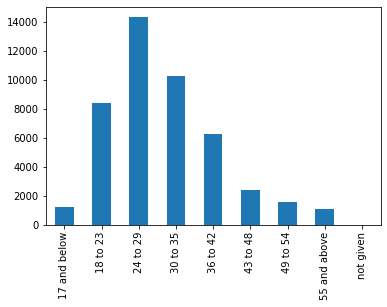

In [8]:
# diving into the Age field

def groupAge(row):
    """
    INPUT
    row - the age of a participant
    
    OUTPUT
    a string of the age group this person belongs to
    
    This function groups the participants into age groups of 6 years starting at 18 and ending at 54
    """
    
    age = df['Age'][row]
    if np.isnan(age):
        return 'not given'
    elif age <= 17:
        return '17 and below'
    elif age <= 23:
        return '18 to 23'
    elif age <= 29:
        return '24 to 29'
    elif age <= 35:
        return '30 to 35'
    elif age <= 42:
        return '36 to 42'
    elif age <= 48:
        return '43 to 48'
    elif age <= 55:
        return '49 to 54'
    else:
        return '55 and above'

ages = df['Age'].groupby(groupAge).count()
ages.plot(kind='bar')

<AxesSubplot:>

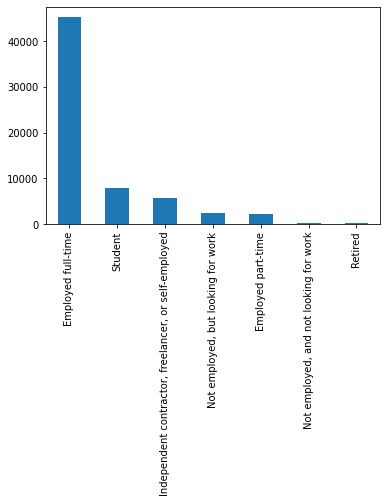

In [9]:
# having a quick look at the Employment status
positions = df['Employment'].value_counts()
positions.plot(kind='bar')

In [10]:
df['DevType'].unique().shape # the amount of dev types

(8270,)

In [11]:
df['DevType'].unique()[:10] # what do they look like?

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan,
       'Designer;Developer, front-end;Developer, mobile',
       'Developer, back-end;Developer, front-end;Developer, QA or test;DevOps specialist',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics',
       'Developer, full-stack',
       'Database administrator;Developer, full-stack;Developer, mobile',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end',
       'Designer;Developer, front-end'], dtype=object)

In [12]:
def get_dev_type_values(dev_type):
    '''
    INPUT
    dev_type - developer type row
    
    OUTPUT
    values - list of developer types
    '''
    
    values = set()
    
    first = dev_type.split(', ')
    for item in first:
        second = item.split(';')
        values.update(second)
        
    return values

def get_dev_type_possible_values(series):
    '''
    INPUT
    series - series is developer types
    
    OUTPUT
    values - list of all possible developer types
    ''' 
    
    series = series.dropna()
    
    values = set()
    for value in series:
        item_values = get_dev_type_values(value)
        values.update(item_values)
        
    return values

In [13]:
dev_types = get_dev_type_possible_values(df['DevType'])
dev_types

{'Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer',
 'Educator',
 'Engineer',
 'Engineering manager',
 'Marketing or sales professional',
 'Product manager',
 'QA or test',
 'Scientist',
 'Senior executive/VP',
 'System administrator',
 'back-end',
 'data',
 'desktop or enterprise applications',
 'embedded applications or devices',
 'front-end',
 'full-stack',
 'game or graphics',
 'mobile',
 'site reliability'}

In [14]:
def create_dev_type_df(series, dev_types):
    '''
    INPUT
    series - series is developer types
    dev_types - list of all possible developer types
    
    OUTPUT
    df - dataframe of dev type 'dummies'
    ''' 
        
    df = pd.DataFrame()
    
    for dev_type in dev_types:

        def is_dev_type(row):
            try:
                return 1 if dev_type in row else 0
            except:
                return 0

        dev_type_series = series.apply(is_dev_type)
        
        df[dev_type] = dev_type_series
    
    return df

In [15]:
dev_type_df = create_dev_type_df(df['DevType'], dev_types)
dev_type_df.shape

(64461, 25)

In [16]:
dev_type_df.head()

,data,Engineer,System administrator,Engineering manager,embedded applications or devices,Database administrator,Senior executive/VP,back-end,Data or business analyst,site reliability,...,Educator,mobile,Marketing or sales professional,Developer,Scientist,Academic researcher,front-end,Product manager,Designer,full-stack
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dev_type_counts = dev_type_df[dev_type_df == 1].count()
dev_type_counts

data                                              3738
Engineer                                          7112
System administrator                              5242
Engineering manager                               2724
embedded applications or devices                  4750
Database administrator                            5722
Senior executive/VP                               1320
back-end                                         27228
Data or business analyst                          4024
site reliability                                  1940
desktop or enterprise applications               11784
game or graphics                                  2789
Data scientist or machine learning specialist     3988
QA or test                                        3947
DevOps specialist                                 5969
Educator                                          2928
mobile                                            9482
Marketing or sales professional                    642
Developer 

<AxesSubplot:>

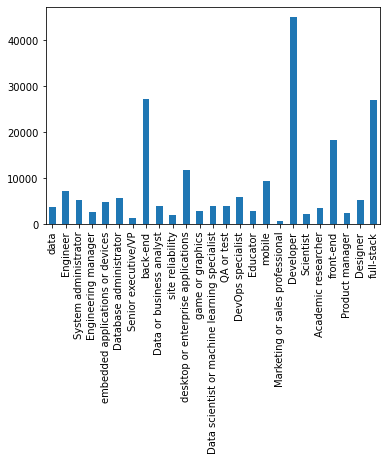

In [18]:
dev_type_counts.plot(kind='bar')

<AxesSubplot:>

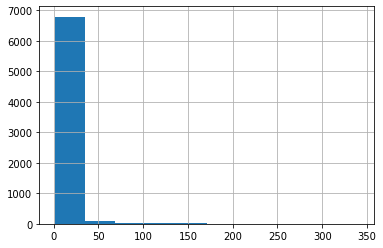

In [19]:
df['ConvertedComp'].value_counts().hist()

**Prepare Data**

The data and visualisations obtained above give us some interesting insight in our data. The next step is to model our data, but before we can do that, we need to make sure we have only numeric data.

Therefore, the following steps have been undertaken to create numerical data:
- Hobbyist data: this was a 'Yes' or 'No' question, so we just turned 'Yes' into 1's and 'No' into 0's.
- Employment status: this data is a categorical column which can quite easily be turned numerical by creating dummies.
- Age: we have two options here. Firstly, use our age groups and create dummies for each group. Or secondly, to leave the age a numerical value. In case of the latter, we will need to fill the nan values and it's probably safest to use the mean age for this. I went with this second method.
- Developer types: we can use the dev_type_df that we obtained from breaking into the field here. The 'DevType' columns itself is categorical, and by creating dummies straight away, we would end up with over 8000 dummies that wouldn't say much. But by breaking it down, we now have about 30 columns that are a way better representation.

In [ ]:
def clean_data(df, dev_type_df):
    '''
    INPUT
    df - pandas dataframe
    dev_type_df - dataframe of dev type 'dummies'
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Turns hobbyist column into 1's and 0's.
    2. Created employment dummies
    3. Put all columns of interest together
    4. Drops the rows without salary
    5. Splits the df into X and Y
    '''
    
    hobbyist_sr = df['Hobbyist'].apply(lambda row : 1 if row == 'Yes' else 0)
    employment_dummies = df['Employment'].str.get_dummies()
    
    df = pd.concat([df['ConvertedComp'], df['Age'], hobbyist_sr, employment_dummies, dev_type_df], axis=1)
    
    df = df.dropna(subset=['ConvertedComp'])
    
    X = df.drop(columns=['ConvertedComp'])
    y = df['ConvertedComp']
    
    return X, y

In [21]:
#Use the function to create X and y
X, y = clean_data(df, dev_type_df)
X.shape, y.shape

((34756, 34), (34756,))

In [22]:
X.head()

,Age,Hobbyist,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Student,data,...,Educator,mobile,Marketing or sales professional,Developer,Scientist,Academic researcher,front-end,Product manager,Designer,full-stack
7,36.0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,22.0,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
10,23.0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
11,49.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
12,53.0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
X.count()

Age                                                     30596
Hobbyist                                                34756
Employed full-time                                      34756
Employed part-time                                      34756
Independent contractor, freelancer, or self-employed    34756
Not employed, and not looking for work                  34756
Not employed, but looking for work                      34756
Retired                                                 34756
Student                                                 34756
data                                                    34756
Engineer                                                34756
System administrator                                    34756
Engineering manager                                     34756
embedded applications or devices                        34756
Database administrator                                  34756
Senior executive/VP                                     34756
back-end

**Model Data**

We will use the prepared data for our data model. We do a little more preparation in this step to prevent data leakage (see split method), and will then use a linear regression model to fit our data.

In [24]:
def split(X, y):
    '''
    INPUT
    X - matrix holding the variables
    y - response vector
    
    OUTPUT
    X_train, X_test, y_train, y_test - data sets
    
    This function cleans df using the following steps to produce X and y:
    1. Splits X and y into train and test
    2. Fill empty age values with mean
    '''
        
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # to prevent data leakage, setting the mean of the age here.
    X_train_mean = X_train['Age'].mean()
    X_test_mean = X_test['Age'].mean()
    X_train['Age'] = X_train['Age'].fillna(value=X_train_mean)
    X_test['Age'] = X_test['Age'].fillna(value=X_test_mean)
    
    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = split(X, y)

<ipython-input-24-beedb064fbf6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'] = X_train['Age'].fillna(value=X_train_mean)
<ipython-input-24-beedb064fbf6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'] = X_test['Age'].fillna(value=X_test_mean)


In [26]:
X_train['Age'].count()

26067

In [27]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(normalize=True)

**Results**

We will then use our test data to see how well our model works, which is determined by the r2 score that's obtained by comparing the actual test values and the values calculated by our model.

In [28]:
# Predict using model
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

# Score using model
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

test_score, train_score

(0.022481466306124465, 0.01797731587934759)

**Results (conclusion)**

Unfortunately, our model shows an extremely low r2 score, which means that it isn't capable of properly predicting the salaries based on the fields that we have looked into. This does show, however, that the fields we looked into do not show a strong correlation to the salary.

The next step would be to improve our model, for which we can take noumerous steps. We could just include more fields which will increase the chance of some having a positive effect on our score. Besides that, we could have looked into the 'DevType' field a different way. We now split by ', ' and ';', but only splitting by ';' might be enough and actually give better results. We could also try to use the age groups intead of the actual ages where we used means for the missing values.

As for now, we can only properly use the data and visualisations in the 'Data Understanding' chapter of this notebook. The discussion concerning this can be read in this blog post: https://pimvschayik-69902.medium.com/quick-insight-on-stack-overflow-data-7c89f5644a67